# Import Libraries

In [1]:
# DATA MODELLING
import pandas as pd
import numpy as np

# DATA EXPLORATION - DATA VISUALIZATION
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,6)

In [2]:
import warnings
warnings.simplefilter('ignore')

# Contesto
Questo set di dati contiene 48 features estratte da 5000 pagine Web di phishing e 5000 pagine Web legittime, che sono state scaricate da gennaio a maggio 2015 e da maggio a giugno 2017.
I ricercatori e gli esperti anti-phishing possono trovare questo set di dati utile per l'analisi delle caratteristiche del phishing, per condurre rapidi esperimenti di prova concettuale o per confrontare i modelli di classificazione del phishing.
# Obiettivo 
Classificare correttamente gli url fraudolenti e quelli non pericolosi.


## Load Data

In [3]:
df = pd.read_csv('..\data\Phishing_Legitimate_full.csv', index_col='id')

## Data Exploration

In [4]:
df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
id,,,,,,,,,,,,,,,,,,,,,
1,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
2,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
3,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
4,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
5,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000

Non sono presenti valori nulli all'interno del dataset

In [6]:
df.isna().sum().sum()

0

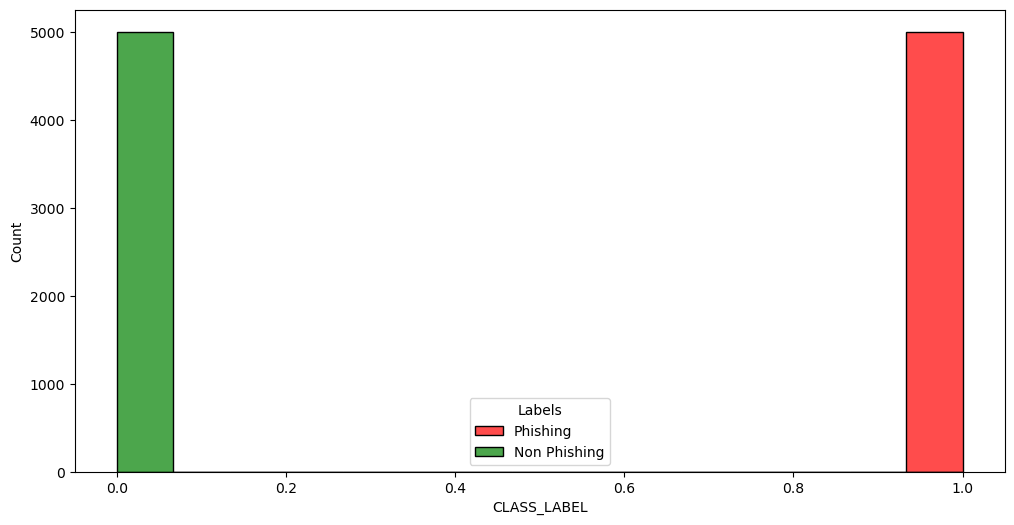

In [7]:
palette ={0: "green", 1: "red"}

sns.histplot(df, x='CLASS_LABEL', hue='CLASS_LABEL', palette=palette, alpha=.7)
plt.legend(['Phishing', 'Non Phishing'], title='Labels')
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000

La matrice di correlazione ci permette di individuare le colonne più significative all'intenro del dataframe.
`HttpsInHostname` è presente in tutte le colonne pertanto non sarà necessario includerlo nell'analisi

<AxesSubplot:>

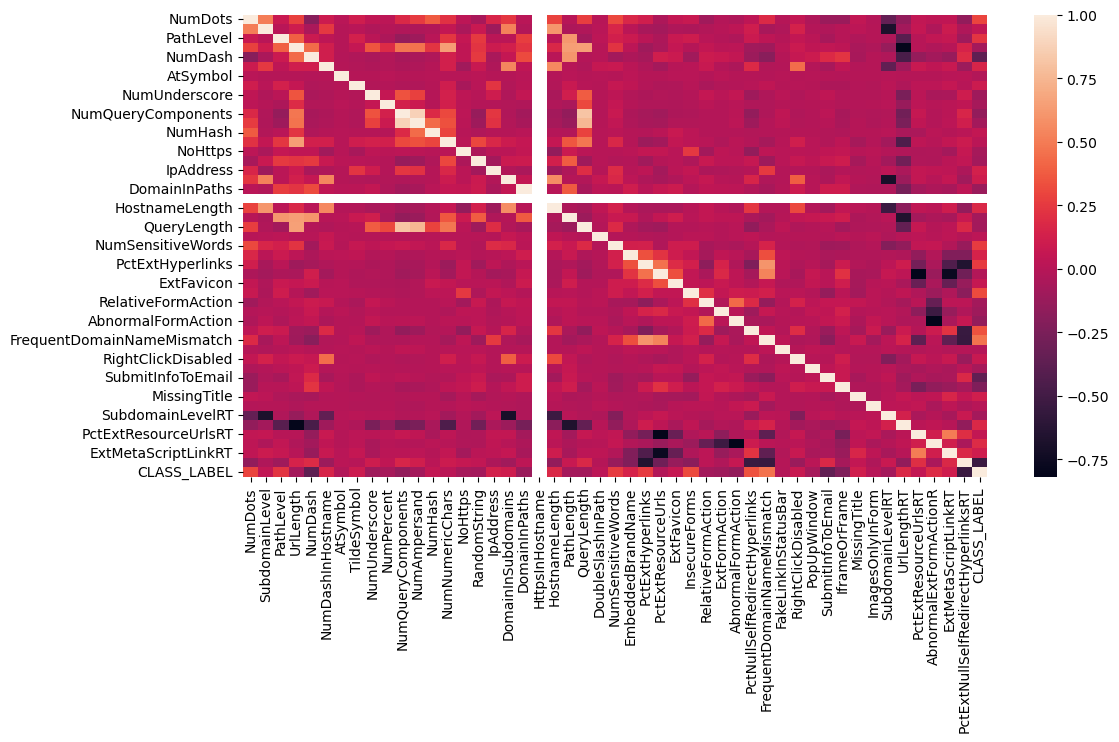

In [9]:
sns.heatmap(df.corr())

# Features Selection

In [10]:
def top_correleted_columns(corr: pd.DataFrame, target: str, top_n:int = 5) -> np.array:
    '''Restituisce un array di nomi di colonne che sono più correlate in assoluto, con la colonna di `target`

    :param pd.DataFrame corr: correlazione del dataframe, consiglio di passare data.corr()
    :param str target: nome della colonna di `target`, la y 
    :param int top_n: numero di nomi colonne darestituire, defaults to 5
    '''    
    sorted_corr = corr.loc[target].abs().sort_values(ascending=False)
    return sorted_corr[:top_n+1].index.values

In questa funzione, utilizzando la correlazione del dataframe, possiamo estrarre le features più rilevanti per la nostra analisi

In [11]:
df[top_correleted_columns(df.corr(), "CLASS_LABEL", 10)].corr()

,CLASS_LABEL,PctExtNullSelfRedirectHyperlinksRT,FrequentDomainNameMismatch,NumDash,SubmitInfoToEmail,PctNullSelfRedirectHyperlinks,InsecureForms,NumDots,PctExtHyperlinks,NumSensitiveWords,IframeOrFrame
CLASS_LABEL,1.000000,-0.540545,0.463956,-0.372235,-0.357635,0.342806,0.316380,0.294111,0.259728,0.255208,-0.235233
PctExtNullSelfRedirectHyperlinksRT,-0.540545,1.000000,-0.549630,0.184808,0.174714,-0.548650,-0.181724,-0.153835,-0.656196,-0.125761,-0.069074
FrequentDomainNameMismatch,0.463956,-0.549630,1.000000,-0.188701,-0.179616,0.038521,0.125964,0.177703,0.598203,0.140990,-0.011897
NumDash,-0.372235,0.184808,-0.188701,1.000000,0.181687,-0.113173,-0.091292,-0.198769,-0.070490,-0.081733,0.228154
SubmitInfoToEmail,-0.357635,0.174714,-0.179616,0.181687,1.000000,-0.116218,-0.142389,-0.117766,-0.067086,-0.099405,0.070346
PctNullSelfRedirectHyperlinks,0.342806,-0.548650,0.038521,-0.113173,-0.116218,1.000000,0.093503,0.033516,-0.235334,-0.004827,0.033643
InsecureForms,0.316380,-0.181724,0.125964,-0.091292,-0.142389,0.093503,1.000000,0.072103,0.120508,0.099788,0.016164
NumDots,0.294111,-0.153835,0.177703,-0.198769,-0.117766,0.033516,0.072103,1.000000,0.116726,0.305793,-0.117210
PctExtHyperlinks,0.259728,-0.656196,0.598203,-0.070490,-0.067086,-0.235334,0.120508,0.116726,1.000000,0.126763,0.096150
NumSensitiveWords,0.255208,-0.125761,0.140990,-0.081733,-0.099405,-0.004827,0.099788,0.305793,0.126763,1.000000,-0.092307


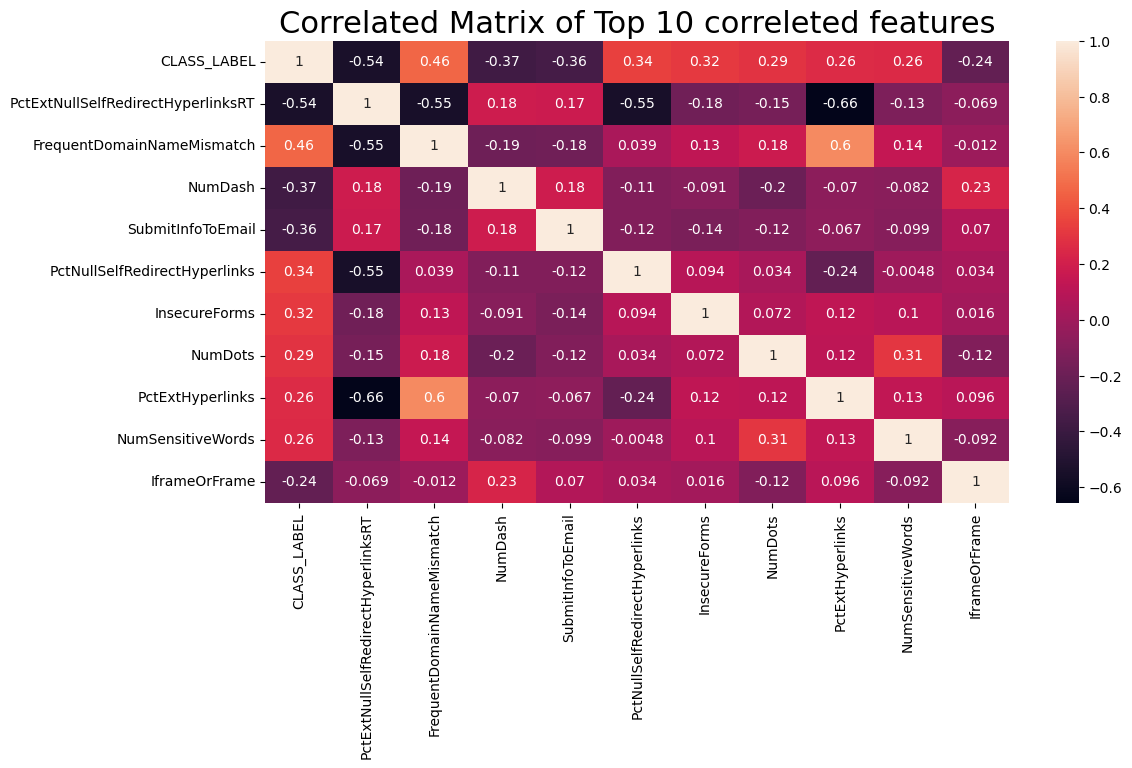

In [12]:
sns.heatmap(df[top_correleted_columns(df.corr(), "CLASS_LABEL", 10)].corr(), annot=True)

plt.title('Correlated Matrix of Top 10 correleted features', fontsize=22)
plt.show()

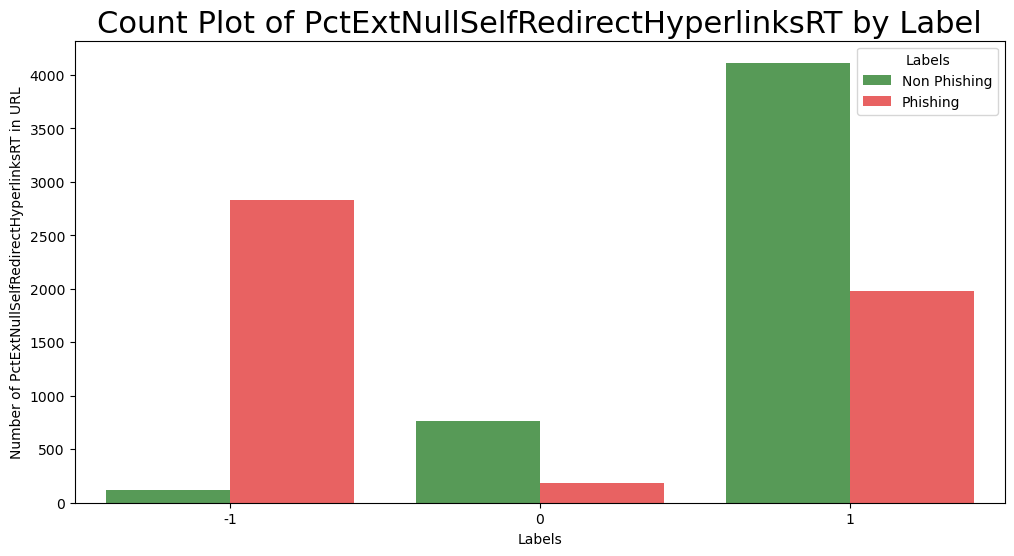

In [13]:
sns.countplot(data=df, x='PctExtNullSelfRedirectHyperlinksRT', hue='CLASS_LABEL', palette=palette, alpha=.7)

plt.title('Count Plot of PctExtNullSelfRedirectHyperlinksRT by Label', fontsize=22)
plt.ylabel('Number of PctExtNullSelfRedirectHyperlinksRT in URL')
plt.xlabel('Labels')
plt.legend(['Non Phishing', 'Phishing'], title='Labels')
plt.show()

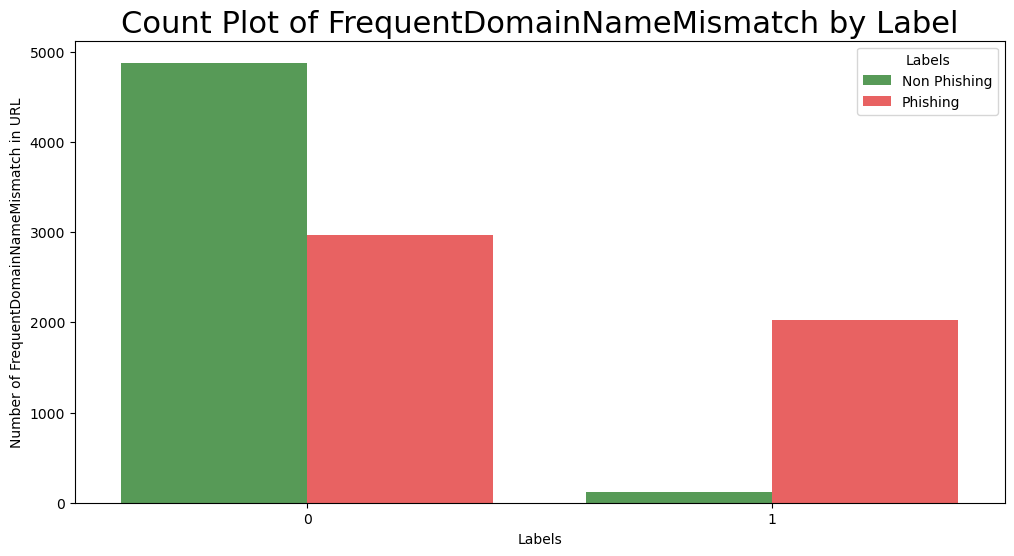

In [14]:
sns.countplot(data=df, x='FrequentDomainNameMismatch', hue='CLASS_LABEL', palette=palette, alpha=.7)

plt.title('Count Plot of FrequentDomainNameMismatch by Label', fontsize=22)
plt.ylabel('Number of FrequentDomainNameMismatch in URL')
plt.xlabel('Labels')
plt.legend(['Non Phishing', 'Phishing'], title='Labels')
plt.show()

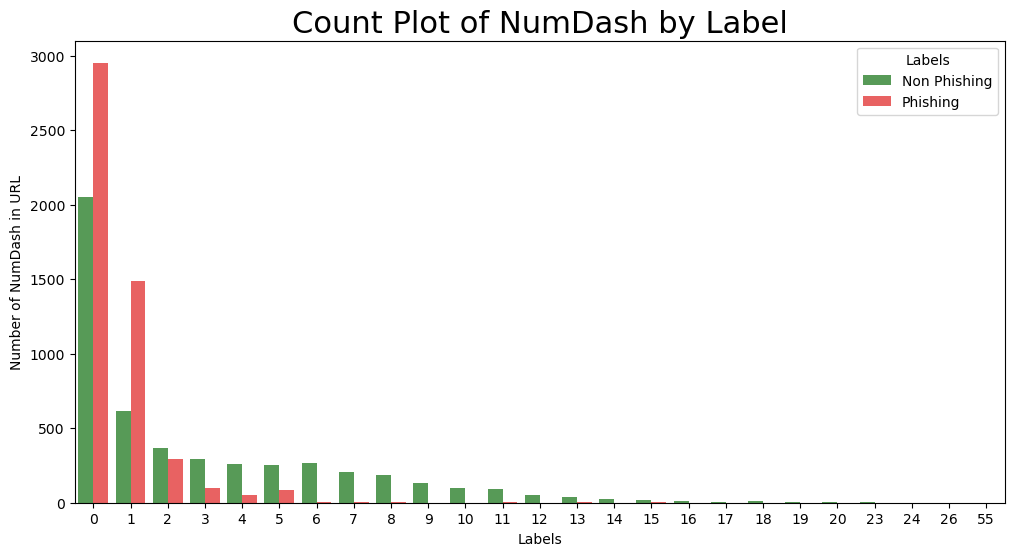

In [15]:
sns.countplot(data=df, x='NumDash', hue='CLASS_LABEL', palette=palette, alpha=.7)

plt.title('Count Plot of NumDash by Label', fontsize=22)
plt.ylabel('Number of NumDash in URL')
plt.xlabel('Labels')
plt.legend(['Non Phishing', 'Phishing'], title='Labels')
plt.show()

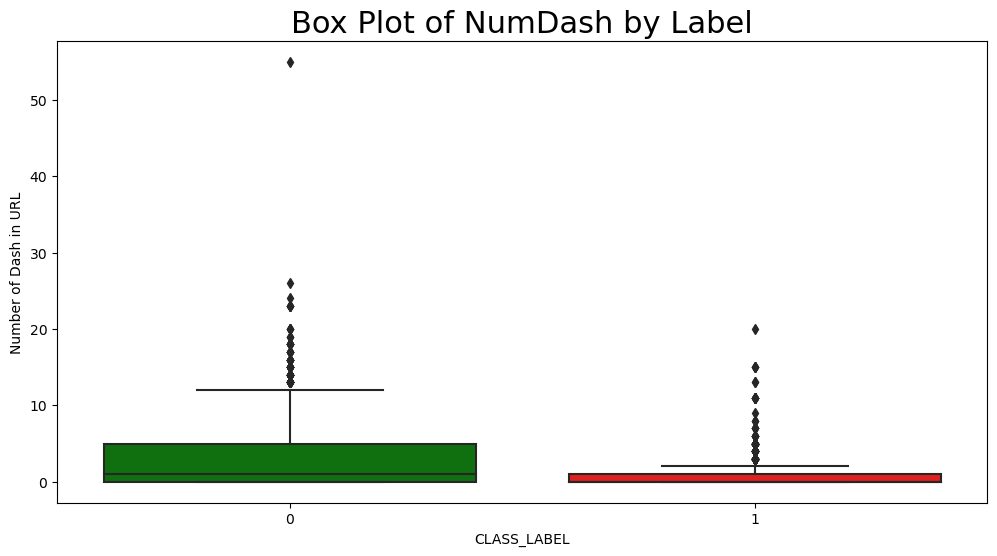

In [16]:
sns.boxplot(x='CLASS_LABEL', y='NumDash', data=df, palette=palette)

plt.title('Box Plot of NumDash by Label', fontsize=22)
plt.ylabel('Number of Dash in URL')
plt.show()

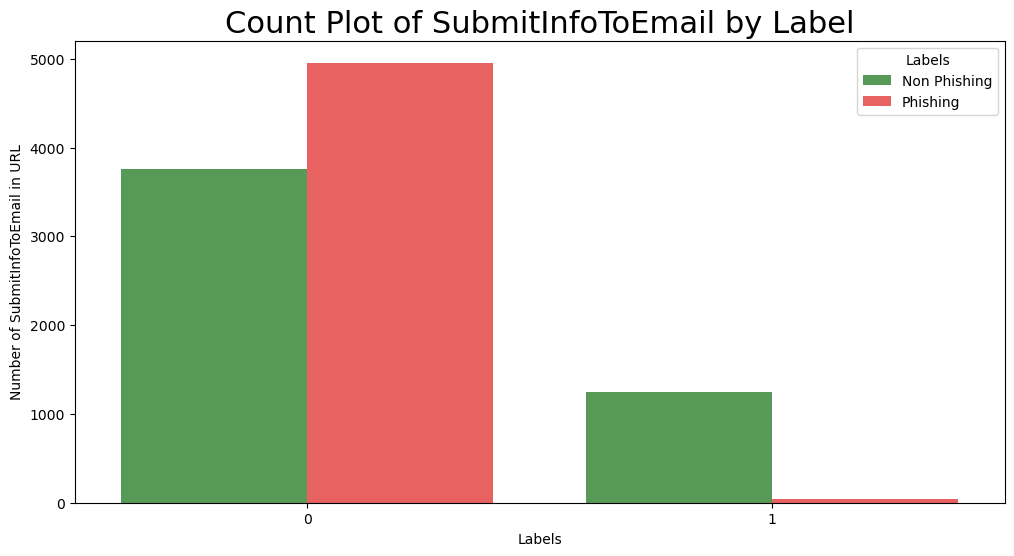

In [17]:
sns.countplot(data=df, x='SubmitInfoToEmail', hue='CLASS_LABEL', palette=palette, alpha=.7)

plt.title('Count Plot of SubmitInfoToEmail by Label', fontsize=22)
plt.ylabel('Number of SubmitInfoToEmail in URL')
plt.xlabel('Labels')
plt.legend(['Non Phishing', 'Phishing'], title='Labels')
plt.show()

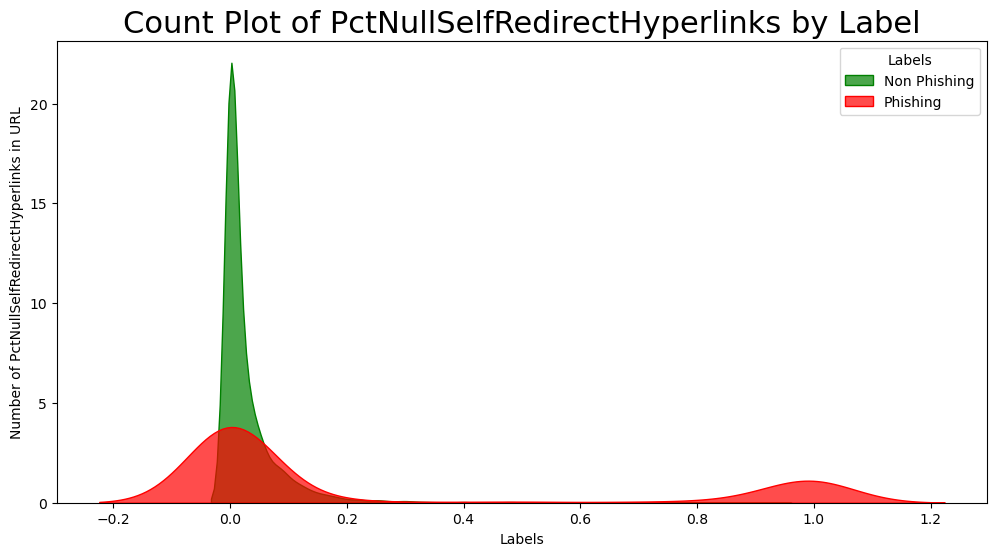

In [18]:
sns.kdeplot(df.loc[df['CLASS_LABEL'] == 0, "PctNullSelfRedirectHyperlinks"], shade=True, color="green", label="Non Phishing", alpha=.7)
sns.kdeplot(df.loc[df['CLASS_LABEL'] == 1, "PctNullSelfRedirectHyperlinks"], shade=True, color="red", label="Phishing", alpha=.7)


plt.title('Count Plot of PctNullSelfRedirectHyperlinks by Label', fontsize=22)
plt.ylabel('Number of PctNullSelfRedirectHyperlinks in URL')
plt.xlabel('Labels')
plt.legend(['Non Phishing', 'Phishing'], title='Labels')
plt.show()

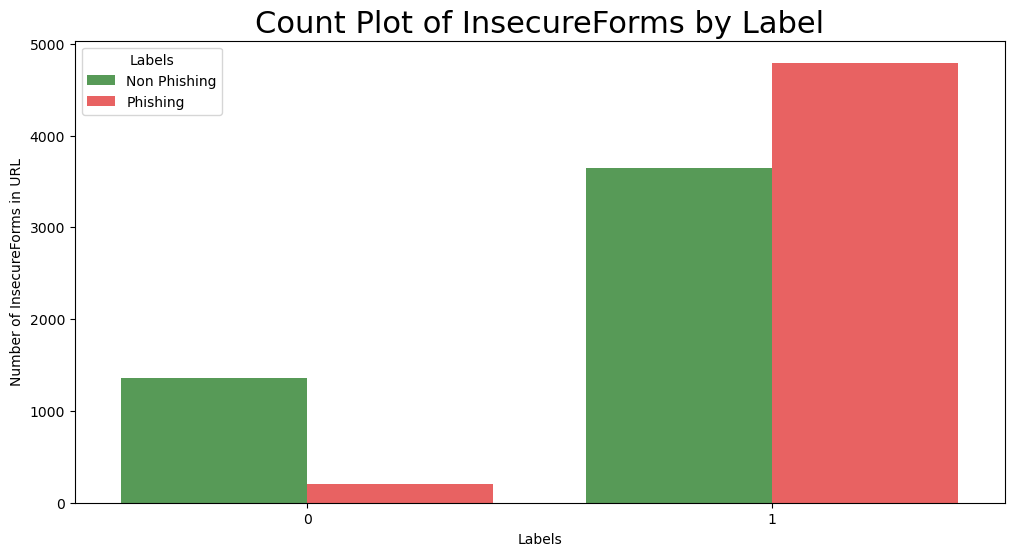

In [19]:
sns.countplot(data=df, x='InsecureForms', hue='CLASS_LABEL', palette=palette, alpha=.7)

plt.title('Count Plot of InsecureForms by Label', fontsize=22)
plt.ylabel('Number of InsecureForms in URL')
plt.xlabel('Labels')
plt.legend(['Non Phishing', 'Phishing'], title='Labels')
plt.show()

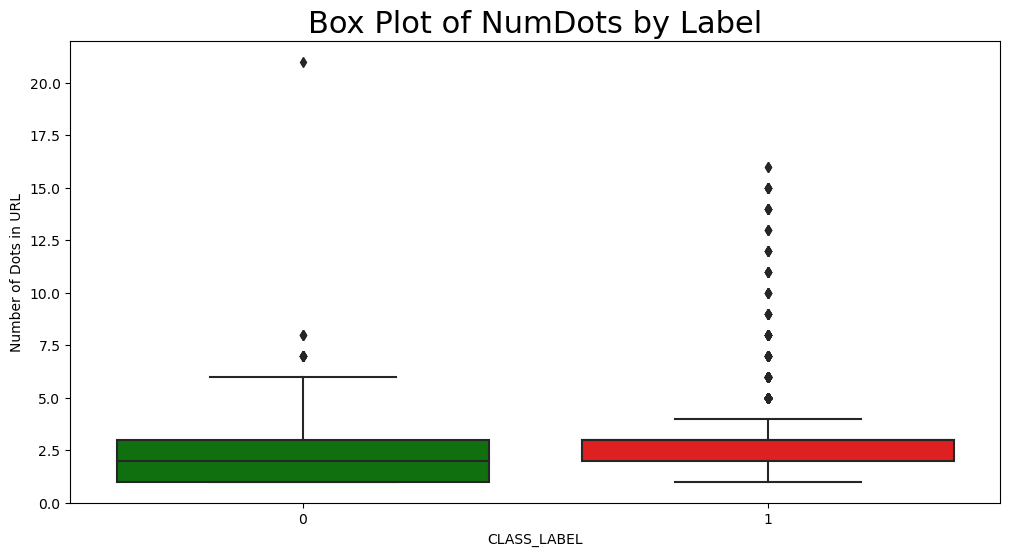

In [20]:
sns.boxplot(x='CLASS_LABEL', y='NumDots', data=df, palette=palette)

plt.title('Box Plot of NumDots by Label', fontsize=22)
plt.ylabel('Number of Dots in URL')
plt.show()

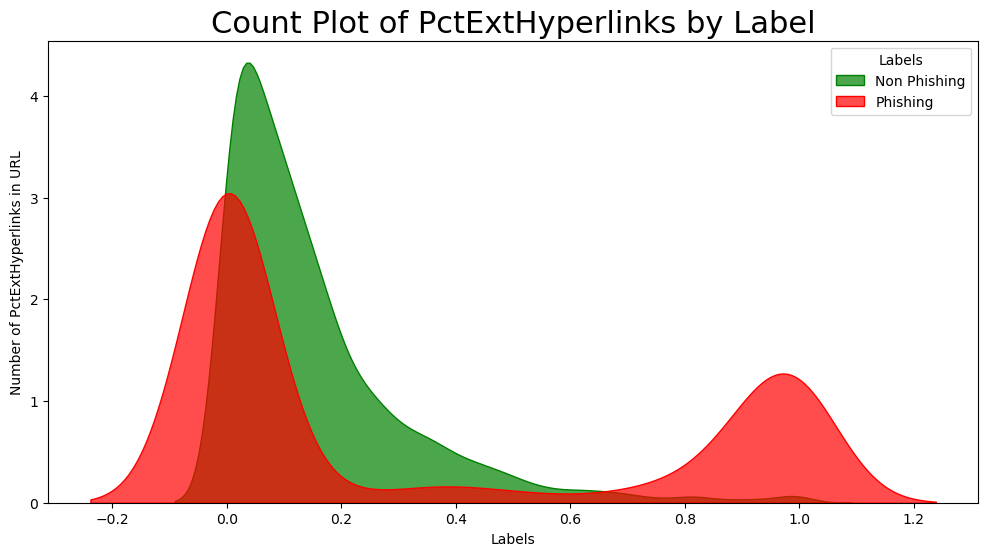

In [21]:
sns.kdeplot(df.loc[df['CLASS_LABEL'] == 0, "PctExtHyperlinks"], shade=True, color="green", label="Non Phishing", alpha=.7)
sns.kdeplot(df.loc[df['CLASS_LABEL'] == 1, "PctExtHyperlinks"], shade=True, color="red", label="Phishing", alpha=.7)

plt.title('Count Plot of PctExtHyperlinks by Label', fontsize=22)
plt.ylabel('Number of PctExtHyperlinks in URL')
plt.xlabel('Labels')
plt.legend(['Non Phishing', 'Phishing'], title='Labels')
plt.show()
# IMPORTANTE

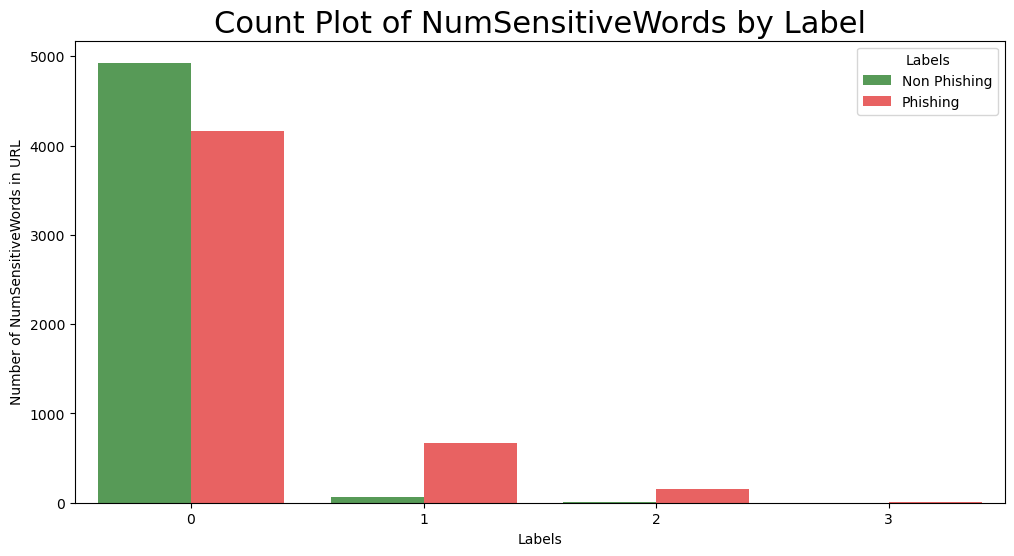

In [22]:
sns.countplot(data=df, x='NumSensitiveWords', hue='CLASS_LABEL', palette=palette, alpha=.7)

plt.title('Count Plot of NumSensitiveWords by Label', fontsize=22)
plt.ylabel('Number of NumSensitiveWords in URL')
plt.xlabel('Labels')
plt.legend(['Non Phishing', 'Phishing'], title='Labels')
plt.show()

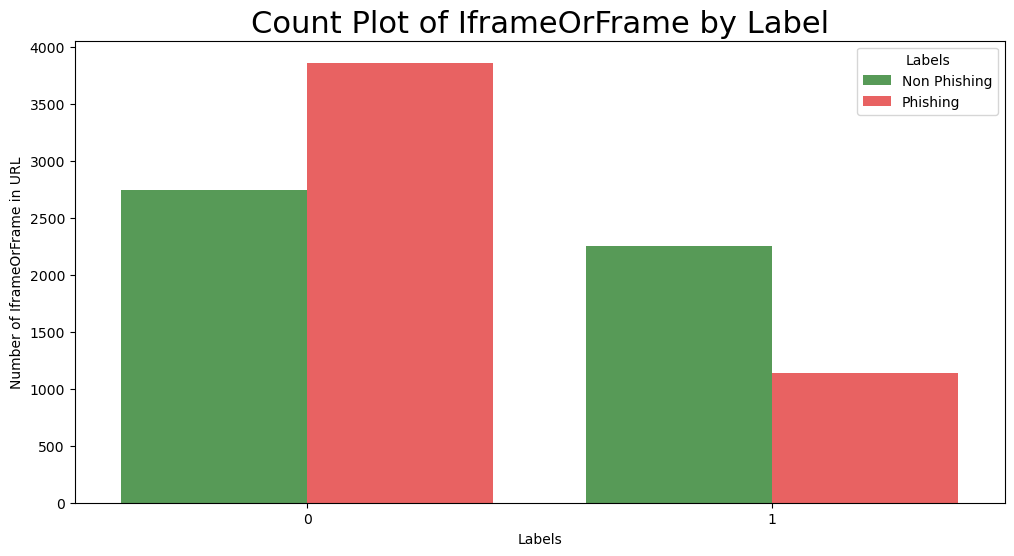

In [23]:
sns.countplot(data=df, x='IframeOrFrame', hue='CLASS_LABEL', palette=palette, alpha=.7)

plt.title('Count Plot of IframeOrFrame by Label', fontsize=22)
plt.ylabel('Number of IframeOrFrame in URL')
plt.xlabel('Labels')
plt.legend(['Non Phishing', 'Phishing'], title='Labels')
plt.show()

## Set Features and Target

In [24]:
from sklearn.model_selection import train_test_split


X = df[top_correleted_columns(df.corr(), "CLASS_LABEL", 10)].drop('CLASS_LABEL', axis=1)
y = df['CLASS_LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [25]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred)

0.9706060606060606

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1622
           1       0.97      0.97      0.97      1678

    accuracy                           0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.97      0.97      0.97      3300



In [28]:
def evaluete_model(estimator, df: pd.DataFrame, target: str, min_col: int = 1, max_col: int = df.shape[1]) -> pd.DataFrame:
    models = []
    # ciclo che aggiunge alle features una colonna alla volta
    for i in range(min_col, max_col):
        X = df[top_correleted_columns(df.corr(), target, i)].drop(target, axis=1)
        y = df[target]

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)
        clf = estimator
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        resoconto = {
            'n_colonne': i,
            'features': X.columns.to_list(),
            'accuracy_score': accuracy_score(y_test, y_pred)}
        
        models.append(resoconto)
    
    return pd.DataFrame(models)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

# creazione dei dataframe di performance
df_rfc = evaluete_model(RandomForestClassifier(), df, "CLASS_LABEL")
df_lr  = evaluete_model(LogisticRegression(), df, "CLASS_LABEL")
df_svm = evaluete_model(LinearSVC(), df, "CLASS_LABEL")
df_svc = evaluete_model(SVC(), df, "CLASS_LABEL")
df_dct = evaluete_model(DecisionTreeClassifier(), df, "CLASS_LABEL")
df_knn = evaluete_model(KNeighborsClassifier(), df, "CLASS_LABEL")


In [30]:

print(f'Il classificatore RandomForestClassifier ha ottenuto un best score di {df_rfc.accuracy_score.max():.2f}' )
print(f'Il classificatore LogisticRegression ha ottenuto un best score di {df_lr.accuracy_score.max():.2f}' )
print(f'Il classificatore LinearSVC ha ottenuto un best score di {df_svm.accuracy_score.max():.2f}' )
print(f'Il classificatore SVC ha ottenuto un best score di {df_svc.accuracy_score.max():.2f}' )
print(f'Il classificatore DecisionTreeClassifier ha ottenuto un best score di {df_dct.accuracy_score.max():.2f}' )
print(f'Il classificatore KNeighborsClassifier ha ottenuto un best score di {df_knn.accuracy_score.max():.2f}' )


Il classificatore RandomForestClassifier ha ottenuto un best score di 0.98
Il classificatore LogisticRegression ha ottenuto un best score di 0.93
Il classificatore LinearSVC ha ottenuto un best score di 0.94
Il classificatore SVC ha ottenuto un best score di 0.92
Il classificatore DecisionTreeClassifier ha ottenuto un best score di 0.97
Il classificatore KNeighborsClassifier ha ottenuto un best score di 0.96


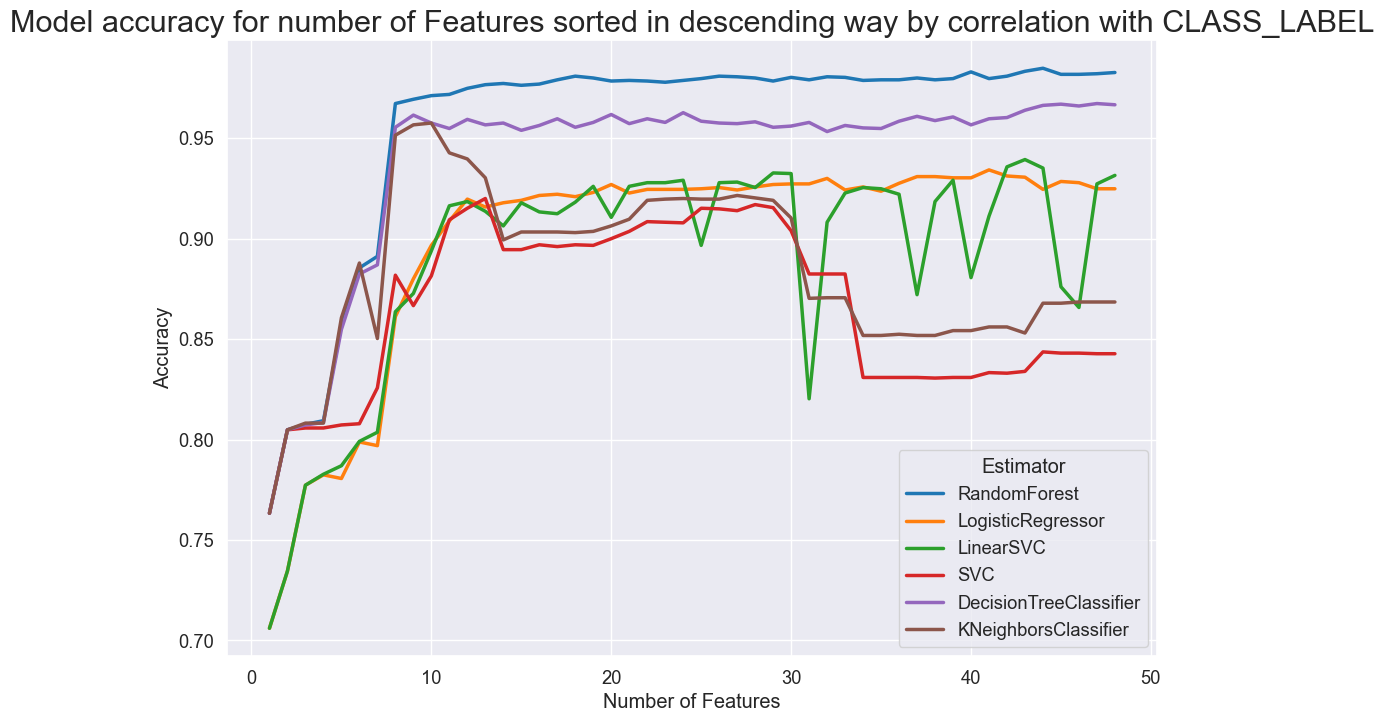

In [31]:
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data=df_rfc, x='n_colonne', y='accuracy_score', label='RandomForest', ax=ax)
sns.lineplot(data=df_lr,  x='n_colonne', y='accuracy_score', label='LogisticRegressor', ax=ax)
sns.lineplot(data=df_svm, x='n_colonne', y='accuracy_score', label='LinearSVC', ax=ax)
sns.lineplot(data=df_svc, x='n_colonne', y='accuracy_score', label='SVC', ax=ax)
sns.lineplot(data=df_dct, x='n_colonne', y='accuracy_score', label='DecisionTreeClassifier', ax=ax)
sns.lineplot(data=df_knn, x='n_colonne', y='accuracy_score', label='KNeighborsClassifier', ax=ax)

plt.title('Model accuracy for number of Features sorted in descending way by correlation with CLASS_LABEL', fontsize=22)
plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.legend(title='Estimator', loc='lower right')

plt.show()

Analizzando il grafico ottenuto, e i dati all'interno dei dataframe precedentemente creati, possiamo notare che tutti i modelli migliorano la prorpia accuracy significativamente quando viene considerata la feature che viene ciclata per ottava, stiamo parlando di `PctExtHyperlinks`

Esaminiamo l'andamento dell'accuracy delle features vicine all'ottava

In [32]:
df_rfc = evaluete_model(RandomForestClassifier(), df, "CLASS_LABEL", min_col=5, max_col=12)
df_lr  = evaluete_model(LogisticRegression(), df, "CLASS_LABEL", min_col=5, max_col=12)
df_svm = evaluete_model(LinearSVC(), df, "CLASS_LABEL", min_col=5, max_col=12)
df_svc = evaluete_model(SVC(), df, "CLASS_LABEL", min_col=5, max_col=12)
df_dct = evaluete_model(DecisionTreeClassifier(), df, "CLASS_LABEL", min_col=5, max_col=12)
df_knn = evaluete_model(KNeighborsClassifier(), df, "CLASS_LABEL", min_col=5, max_col=12)

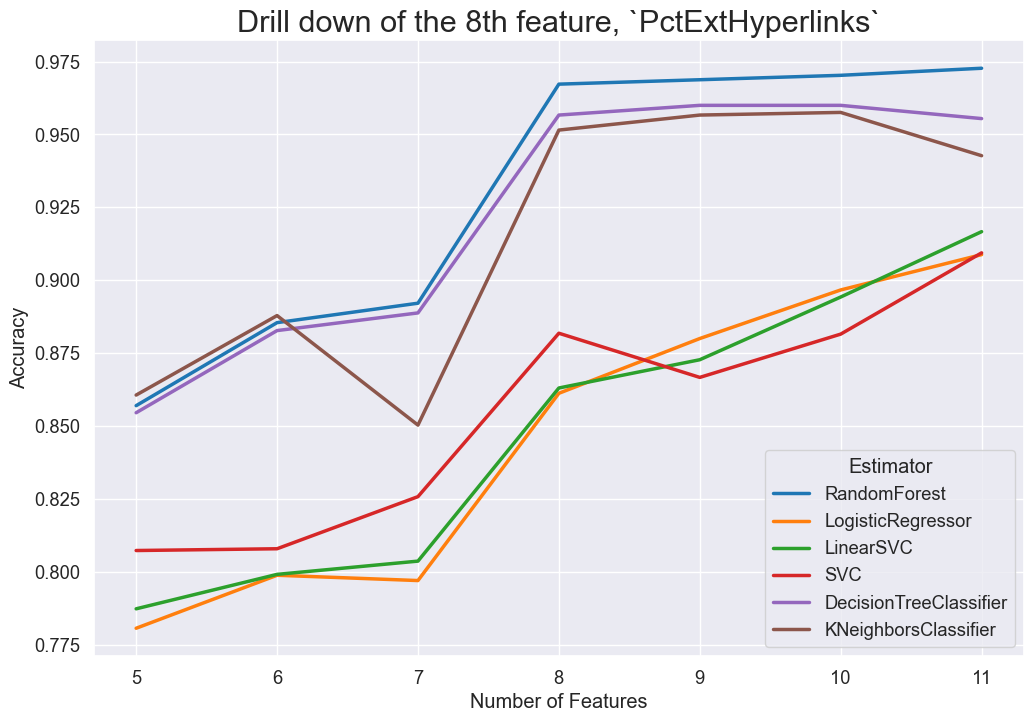

In [33]:
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data=df_rfc, x='n_colonne', y='accuracy_score', label='RandomForest', ax=ax)
sns.lineplot(data=df_lr,  x='n_colonne', y='accuracy_score', label='LogisticRegressor', ax=ax)
sns.lineplot(data=df_svm, x='n_colonne', y='accuracy_score', label='LinearSVC', ax=ax)
sns.lineplot(data=df_svc, x='n_colonne', y='accuracy_score', label='SVC', ax=ax)
sns.lineplot(data=df_dct, x='n_colonne', y='accuracy_score', label='DecisionTreeClassifier', ax=ax)
sns.lineplot(data=df_knn, x='n_colonne', y='accuracy_score', label='KNeighborsClassifier', ax=ax)

plt.title('Drill down of the 8th feature, `PctExtHyperlinks`', fontsize=22)
plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.legend(title='Estimator', loc='lower right')

plt.show()

Effettuiamo la controprova, escludendo dalle features di train questa colonna mi aspetto che l'accuracy diminuisca anche con l'aumentare delle features

In [45]:
df_rfc

,n_colonne,features,accuracy_score
0,5,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.856970
1,6,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.885455
2,7,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.892121
3,8,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.967273
4,9,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.968788
5,10,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.970303
6,11,"[PctExtNullSelfRedirectHyperlinksRT, FrequentD...",0.972727


In [51]:
features = df_rfc.at[5, 'features']
features

['PctExtNullSelfRedirectHyperlinksRT',
 'FrequentDomainNameMismatch',
 'NumDash',
 'SubmitInfoToEmail',
 'PctNullSelfRedirectHyperlinks',
 'InsecureForms',
 'NumDots',
 'PctExtHyperlinks',
 'NumSensitiveWords',
 'IframeOrFrame']

In [57]:
no_best_feature = features.copy()
no_best_feature.remove('PctExtHyperlinks')
no_best_feature, len(no_best_feature)

(['PctExtNullSelfRedirectHyperlinksRT',
  'FrequentDomainNameMismatch',
  'NumDash',
  'SubmitInfoToEmail',
  'PctNullSelfRedirectHyperlinks',
  'InsecureForms',
  'NumDots',
  'NumSensitiveWords',
  'IframeOrFrame'],
 9)

In [53]:
X = df[no_best_feature]
y = df['CLASS_LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_pred, y_test)

0.9142424242424242

In [56]:
X = df[df_rfc.loc[4, 'features']]
y = df['CLASS_LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_pred, y_test)

0.9684848484848485

Possiamo affermare che `PctExtHyperlinks` è tra le feature più significative all'interno del dataset per quanto riguarda la classificazione della colonna di target `CLASS_LABEL`

# Tuning modello

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# definisco i parametri per la grid search
parameters = {'n_estimators': [10, 50, 100], 
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

rfc = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rfc, param_grid=parameters)

grid_search.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

Utilizzo il best estimator come miglior risultato poichè è quello che è più ottimizzato per il problema

In [59]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=50)

In [60]:
# stampo i risultati della grid search
print("Migliori parametri: {}".format(grid_search.best_params_))
print("Miglior punteggio di validazione: {:.4f}".format(grid_search.best_score_))

predictions = grid_search.best_estimator_.predict(X_test)

Migliori parametri: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Miglior punteggio di validazione: 0.9645


In [61]:
results = grid_search.cv_results_

# Stampare il tempo di training per ogni combinazione di parametri
for mean_time, params, acc_score in zip(results['mean_fit_time'], results['params'], results['mean_test_score']):
    print("Tempo di training medio: {:.2f}s\nAccuracy_score: {:.4f}\nParametri: {}".format(mean_time, acc_score, params))
    print("===="*30)

Tempo di training medio: 0.06s
Accuracy_score: 0.9610
Parametri: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Tempo di training medio: 0.24s
Accuracy_score: 0.9618
Parametri: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Tempo di training medio: 0.52s
Accuracy_score: 0.9640
Parametri: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tempo di training medio: 0.05s
Accuracy_score: 0.9609
Parametri: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Tempo di training medio: 0.24s
Accuracy_score: 0.9636
Parametri: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Tempo di training medio: 0.45s
Accuracy_score: 0.9640
Parametri: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Tempo di training medio: 0.05s
Accuracy_score: 0.9607
Parametri: {'max_depth': None, '